# **SVM Giriş**

## Import & Data

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("tursu.csv")
df.head()

,Turşu,Limon,Sirke
0,1,14.541182,9.171020
1,1,15.066288,7.708681
2,1,12.784097,9.935294
3,1,11.746347,9.769397
4,0,5.807864,14.875203


---
## Veri HK.

In [20]:
df.columns

Index(['Turşu', 'Limon', 'Sirke'], dtype='object')

In [21]:
df.describe()

,Turşu,Limon,Sirke
count,400.000000,400.000000,400.000000
mean,0.500000,11.164130,12.456428
std,0.500626,5.231158,4.203432
min,0.000000,0.620743,2.989299
25%,0.000000,6.262639,8.634345
50%,0.500000,10.711047,12.550953
75%,1.000000,15.995800,16.171148
max,1.000000,20.786109,20.947857


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Turşu   400 non-null    int64  
 1   Limon   400 non-null    float64
 2   Sirke   400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<AxesSubplot:xlabel='Limon', ylabel='Sirke'>

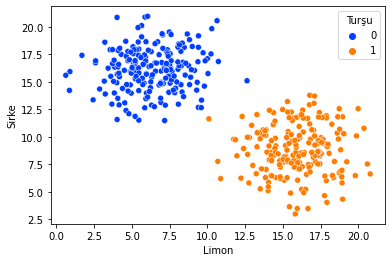

In [23]:
sns.scatterplot(x="Limon", y="Sirke", data=df, hue="Turşu", palette="bright")

---
## SVM Model

In [24]:
X = df.drop("Turşu", axis=1)
y = df["Turşu"]

In [25]:
from sklearn.svm import SVC
# help(SVC)

In [26]:
from svm_margin_plot import plot_svm_boundary
# Kaynak kodlarının olduğu dosyadan indirilebilir

### Lineer Model

In [27]:
svc_model = SVC(kernel="linear")
svc_model.fit(X,y)

SVC(kernel='linear')

C = 1

In [28]:
svc_model.C

1.0

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


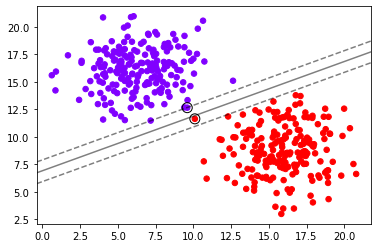

In [29]:
plot_svm_boundary(svc_model, X,y)

C = 500

In [38]:
svc_model = SVC(kernel="linear", C=500)
svc_model.fit(X,y)

SVC(C=500, kernel='linear')

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


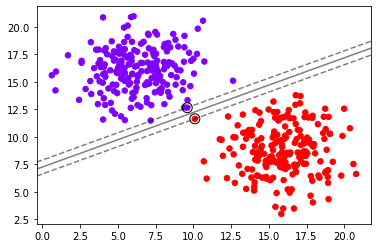

In [39]:
plot_svm_boundary(svc_model, X,y)

C = 0.01

In [34]:
svc_model = SVC(kernel="linear", C=0.01)
svc_model.fit(X,y)

SVC(C=0.01, kernel='linear')

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


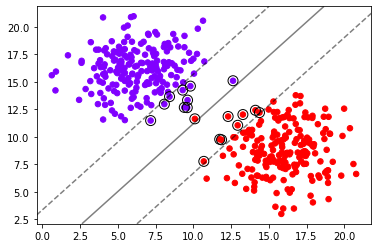

In [35]:
plot_svm_boundary(svc_model, X,y)

### Radial Base Function

In [40]:
svm_model = SVC(kernel="rbf")
svm_model.fit(X,y)

SVC()

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


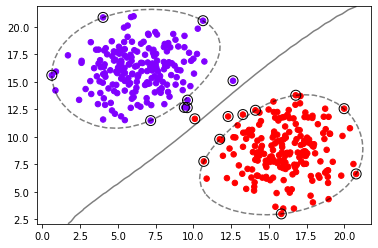

In [41]:
plot_svm_boundary(svm_model, X,y)

### Sigmoid

In [42]:
svm_model = SVC(kernel="sigmoid")
svm_model.fit(X,y)

SVC(kernel='sigmoid')

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


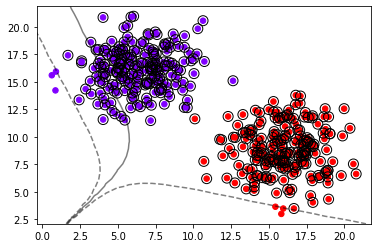

In [43]:
plot_svm_boundary(svm_model, X,y)

### gamma

In [57]:
svm_model = SVC(kernel="rbf", gamma=0.003)
svm_model.fit(X,y)

SVC(gamma=0.003)

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


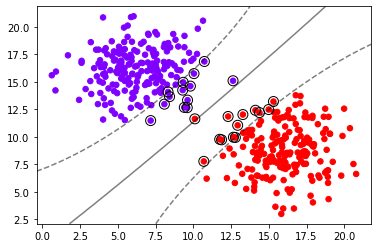

In [58]:
plot_svm_boundary(svm_model, X,y)

In [59]:
svm_model = SVC(kernel="rbf", gamma=0.1)
svm_model.fit(X,y)

SVC(gamma=0.1)

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


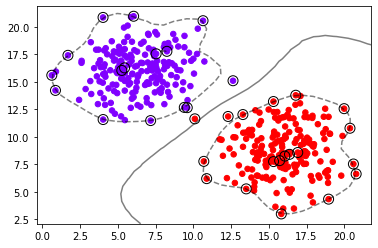

In [60]:
plot_svm_boundary(svm_model, X,y)

### poly - Polinom Kernel

In [63]:
svm_model = SVC(kernel="poly", degree=2)
svm_model.fit(X,y)

SVC(degree=2, kernel='poly')

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


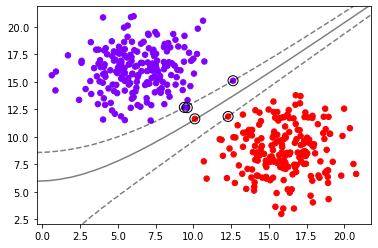

In [64]:
plot_svm_boundary(svm_model, X,y)

In [65]:
svm_model = SVC(kernel="poly", degree=9)
svm_model.fit(X,y)

SVC(degree=9, kernel='poly')

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


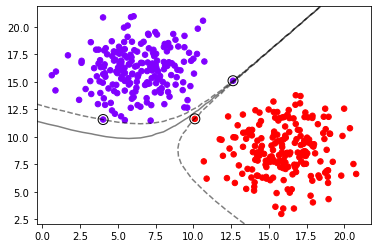

In [66]:
plot_svm_boundary(svm_model, X,y)

## Grid Search

In [67]:
from sklearn.model_selection import GridSearchCV

In [94]:
svm = SVC()

C = 10.**np.arange(-4, 3)

parameters = {
    "C" : C,
    "kernel" : ["rbf","linear"]
}

In [95]:
grid = GridSearchCV(svm, parameters)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['rbf', 'linear']})

In [96]:
grid.best_score_

0.9974999999999999

In [98]:
grid.best_params_
# C değerini değiştirmeyi deneyebilirsin

{'C': 0.0001, 'kernel': 'rbf'}

# **https://youtu.be/SHKwzicmghY**